# 决策树

决策树学习包括：特征选择，决策树生成（只考虑局部最优），决策树剪枝（考虑全局最优）。

* 分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点和有向边组成。结点有两种类型：内部结点和叶节点。内部节点表示一个特征或属性，叶节点表示一个类。

#### 决策树学习

假设给定训练数据集
$$
D={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}
$$

其中，$x_i=(x_i^(1),x_i^(2),...,x_i^(n))^T$为输入实例，$n$为特征个数，$y_i$为类标记，$N$为样本容量。学习的目标是根据给定的训练数据集构建一个决策树模型，使它能够对实例进行正确的分类。

决策树学习本质上是从训练数据集中归纳出一组分类规则。决策树学习是由训练数据集估计条件概率模型。决策树学习的损失函数通常是正则化的极大似然函数，决策树学习的策略是以损失函数为目标函数的最小化。

#### 决策树学习算法

通常是一个递归的选择最优特征，并根据该特征对训练数据进行分割，使得对各个子数据集有一个最好的分类的过程。

开始，构建根节点，将所有训练数据都放在根节点。选择一个最优特征，按照这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。如果这些子集已经能够被基本正确分类，那么构建叶节点，并将这些子集分到所对应的叶节点中去；如果还有子集不能被基本正确分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的节点。如此递归的进行下去，直至所有训练数据子集被基本正确分类，或者没有合适的特征为止。最后每个子集都被分到叶节点上，即都有了明确的类，这就生成了一棵决策树。

### 1.特征选择

#### 1.1  特征选择问题

特征选择的准则是信息增益或信息增益比

#### 1.2 信息增益

熵是表示随机变量不确定性的度量。

X是一个随机变量，概率分布为$P(X=x_i)=p_i$，则随机变量X的熵定义为
$$
H(X)=-\sum_{i=1}^{n}p_ilogp_i
$$

熵只依赖于X的分布，与X的取🈯值无关，也可以记作
$$
H(p)=-\sum_{i=1}^{n}p_ilogp_i
$$

熵越大，随机变量的不确定性就越大。
$$
0\le H(p)\le logn
$$

信息增益表示得知特征X的信息而使得类Y的信息的不确定性减少的程度。

* 特征A对训练数据集D的信息增益$g(D,A)$，定义为集合D的经验熵$H(D)$与特征A给定条件下D的经验条件熵$H(D|A)$之差，即
$$
g(D,A)=H(D)-H(D|A)
$$

$H(D|A)$表示在特征A给定的条件下对数据集D进行分类的不确定性。

一般熵H(Y)与条件熵H(Y|X)之差称为互信息。决策树学习中的信息增益等价于训练数据集中类与特征的互信息。

##### 信息增益算法

* 输入：训练数据集D和特征A
* 输出：特征A对训练数据集D的信息增益g(D,A)

(1) 计算数据集D的经验熵$H(D)$
$$
H(D)=-\sum_{k=1}^{k}\frac{|C_k|}{|D|}log_2 \frac{|C_k|}{|D|} 
$$

(2)计算特征A对数据集D的经验条件熵$H(D|A)$
$$
H(D|A)=\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}log_2\frac{D_{ik}}{D_i} 
$$

(3)计算信息增益
$$
g(D,A)=H(D)-H(D|A)
$$

#### 1.3信息增益比

使用信息增益作为划分训练数据集的特征，存在偏向于选择取值较多的特征的问题。使用信息增益比可以对这一问题进行较正。

特征A对训练数据集D的信息增益比$g_R(D,A)$定义为其信息增益$g(D,A)$与训练数据集D关于特征A的值的熵$H_A(D)$之比，即
$$
g_R(D,A)=\frac{g(D,A)}{H_A(D)}
$$

其中，$H_A(D)=-\sum_{i=1}^{n} \frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|}$，n是特征A取值的个数。

### 2.决策树的生成（ID3算法、C4.5算法）

* ID3算法的核心是在决策树各个结点上应用信息增益准则选择特征，递归地构建决策树。

* 从根节点出发，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为结点的特征由该特征的不同取值建立子节点；再对子节点递归地调用以上方法，构建决策树；直到所有特征的信息增益均很小或没有特征可以选择为止。ID3相当于用极大似然法进行概率模型的选择。

#### ID3算法

* 输入：训练数据集D，特征集A，阈值$\varepsilon$；
* 输出：决策树T；

（1）若D中所有实例属于同一类$C_k$，则T为单节点树，并将类$C_k$作为该节点的类标记，返回T；

（2）若$A=\phi$，则T为单节点树，并将D中实例数最大的类$C_k$作为该节点的类标记，返回T；

（3）否则，按信息增益算法计算A中各特征对D的信息增益，选择信息增益最大的特征$A_g$；

（4）如果$A_g$的信息增益小于阈值$\varepsilon$，则置T为单节点树，并将D中实例数最大的类$C_k$作为该节点的类标记，返回T；

（5）否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将D分割为若干非空子集$D_i$，将$D_i$中实例数最大的类作为标记，构建子节点，由节点及其子节点构成树T，返回T；

（6）对节点i，以$D_i$为训练集，以$A-{A_g}$为特征集，递归地调用（1）～（5），得到子树$T_i$，返回$T_i$；

**该算法生成的树容易产生过拟合。**

#### C4.5算法

 C4.5算法在生成的过程中，用信息增益比来选择特征。

* 输入：训练数据集D，特征集A，阈值$\varepsilon$；
* 输出：决策树T；

（1）若D中所有实例属于同一类$C_k$，则T为单节点树，并将类$C_k$作为该节点的类标记，返回T；

（2）若$A=\phi$，则T为单节点树，并将D中实例数最大的类$C_k$作为该节点的类标记，返回T；

（3）否则，按信息增益比公式计算A中各特征对D的信息增益比，选择信息增益比最大的特征$A_g$；

（4）如果$A_g$的信息增益比小于阈值$\varepsilon$，则置T为单节点树，并将D中实例数最大的类$C_k$作为该节点的类标记，返回T；

（5）否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将D分割为若干非空子集$D_i$，将$D_i$中实例数最大的类作为标记，构建子节点，由节点及其子节点构成树T，返回T；

（6）对节点i，以$D_i$为训练集，以$A-{A_g}$为特征集，递归地调用（1）～（5），得到子树$T_i$，返回$T_i$；

### 3.决策树的剪枝

决策树的剪枝往往通过极小化决策树整体的损失函数或代价函数来实现。

决策树学习的损失函数定义为
$$
C_a(T)=\sum_{t=1}^{|T|}N_tH_t(T)+\alpha |T|
$$

$T$为叶节点个数，$H_t(T)$为叶节点$t$上的经验熵，$N_t$是该叶节点的样本点。|T|表示模型复杂度，较大的$\alpha$促使选择较简单的模型，较小的$\alpha$促使选择较复杂的模型。

经验熵为
$$
H_t(T)=-\sum_{k}\frac{N_{tk}}{N_t}log \frac{N_{tk}}{N_t} 
$$

剪枝，就是当$\alpha$确定时，选择损失函数最小的模型，即损失函数最小的子树。当$\alpha$确定时，子树越大，往往与训练数据的你和越好，但是模型的复杂度越高；反之则相反。

损失函数的极小化等价于正则化的极大似然估计。

#### 剪枝算法

* 输入：生成算法产生的整个树T，参数$\alpha$；
* 输出：修剪后的子树$T_\alpha$；

（1）计算每个结点的经验熵。

（2）递归地从树的叶节点向上回缩。

设一组叶节点回缩到其父结点之前与之后的整体树分别为$T_B$与$T_A$，其对应的损失函数值分别是$C_\alpha(T_A)$与$C_\alpha(T_B)$，如果
$$
C_\alpha(T_A) \le C_\alpha(T_B)
$$
则进行剪枝，将父结点变为新的叶节点。也就是子树的损失函数值大于修剪之后的函数值，则对其进行剪枝。

（3）返回（2），直至不能继续为止，得到损失函数最小的子树$T_\alpha$。

### 4.CART算法（分类与回归树）

CART是在给定输入随机变量X条件下输出随机变量Y的条件概率分布的学习方法。

* CART算法由以下两步组成：
    * （1）决策树生成：基于训练数据集生成决策树，生成的决策树要尽量大；
    * （2）决策树剪枝：用验证数据集对已生成的树进行剪枝并选择最优子树，这时用损失函数最小作为剪枝的标准。

### 4.1CART生成

#### 回归树的生成

##### 最小二乘回归树生成算法

* 输入：训练数据集D；
* 输出：回归树$f(x)$；

在训练数据集所在的输入空间中，递归地将每个区域划分为两个子区域并决定每个子区域上的输出值，构建二叉决策树；

（1） 选择最优切分变量j与切分点s，求解
$$
\min_{j,s}[\min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2 +\min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2 ] 
$$

遍历变量j，对固定的切分变量j扫描切分点s，选择使上式达到最小值的对$(j,s)$。

（2）用选定的对$(j,s)$划分区域并决定相应的输出值：
$$
R_1(j,s)={x|x^{(j)}\le s}, R_2(j,s)={x|x^{(j)} > s}
$$

$$
\hat{c_m}=\frac{1}{N_m} \sum_{x_i\in R_m(j,s)}y_i,x\in R_m,m=1,2
$$

（3）继续对两个子区域调用步骤（1）（2），直至满足停止条件。

（4）将输入空间划分为M个区域$R_1,R_2,...,R_M$，生成决策树：
$$
f(x)=\sum_{m=1}^{M}\hat{c_m}I(x\in R_m)
$$

#### 分类树的生成

分类树用基尼指数选择最优特征。

##### 基尼指数

* 分类问题中，假设有K个类，样本点属于第k类的概率为$p_k$，则概率分布的基尼指数定义为
$$
Gini(p)=\sum_{k=1}^{K}p_k(1-p_k)=1-\sum_{k=1}^{K}p_k^2
$$

* 对于给定的样本集合D，其基尼指数为
$$
Gini(D)=1-\sum_{k=1}^{K}(\frac{|C_k|}{|D|})^2
$$

$C_k$是D中属于第k类的样本子集，K是类的个数。

* 特征A条件下，集合D的基尼指数定义为
$$
Gini(D,A)=\frac{D_1}{D}Gini(D_1)+\frac{D_2}{D}Gini(D_2)
$$

基尼指数$Gini(D)$表示集合D的不确定性，基尼指数$Gini(D,A)$表示经$A=\alpha$分割后集合D的不确定性。基尼指数越大，样本集合的不确定性也越大。

##### CART生成算法

* 输入：训练数据集D，停止计算的条件；
* 输出： CART决策树；

（1）设结点的训练数据集为D，计算现有特征对该数据集的基尼指数。

（2）在所有可能的特征A以及它们所有可能的切分点$\alpha$中，选择基尼指数最小的特征及其对应的切分点作为最优特征与最优切分点。依最优特征与最优切分点，现结点生成两个子节点，将训练数据集依特征分配到两个子节点中去。

（3）对两个子节点递归地调用（1）（2），直至满足停止条件。

（4）生成CART决策树。

算法停止计算的条件是结点中的样本个数小于预定阈值，或样本集的基尼指数小于预定阈值，或者没有更多特征。

### 4.2 CART剪枝

* CART剪枝算法由两步组成：首先从生成算法产生的决策树$T_0$底端开始不断剪枝，直到$T_0$的根节点，形成一个子树序列${T_0,T_1,...,T_n}$；然后通过交叉验证法在独立的验证数据集上对子树序列进行测试，从中选择最优子树。

#### 算法

* 利用独立的验证数据集，测试子树序列$T_0,T_1,...,T_n$中各棵子树的平方误差或基尼指数。平方误差或基尼指数最小的决策树被认为是最优的决策树。

* 输入：CART算法生成的决策树$T_0$；
* 输出：最优决策树$T_\alpha$

（1）设$k=0,T=T_0$；

（2）设$\alpha=+\infty $；

（3）自下而上地对各内部结点t计算$C(T_t)，|T_t|$以及
$$
g(t)=\frac{C(t)-C(T_t)}{|T_t|-1}
$$

$$
\alpha=min(\alpha,g(t))
$$

$T_t$表示以t为根结点的子树，$C(T_t)$是对训练数据的预测误差，$|T_t|$是$T_t$的叶节点个数。

（4）对$g(t)=\alpha$的内部结点t进行剪枝，并对叶节点t以多数表决法决定其类，得到树T。

（5）设$k=k+1,\alpha_k=\alpha,T_k=T$。

（6） 如果$T_k$不是由根节点及两个叶节点构成的树，则回到步骤3；否则令$T_k=T_n$

（7）采用交叉验证法在子树序列$T_0,T_1,...,T_n$中选取最优子树$T_\alpha$。

#### 习题5.1

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

from sklearn import tree
import graphviz

features = ["年龄", "有工作", "有自己的房子", "信贷情况"]
X_train = pd.DataFrame([
    ["青年", "否", "否", "一般"],
    ["青年", "否", "否", "好"],
    ["青年", "是", "否", "好"],
    ["青年", "是", "是", "一般"],
    ["青年", "否", "否", "一般"],
    ["中年", "否", "否", "一般"],
    ["中年", "否", "否", "好"],
    ["中年", "是", "是", "好"],
    ["中年", "否", "是", "非常好"],
    ["中年", "否", "是", "非常好"],
    ["老年", "否", "是", "非常好"],
    ["老年", "否", "是", "好"],
    ["老年", "是", "否", "好"],
    ["老年", "是", "否", "非常好"],
    ["老年", "否", "否", "一般"]
])
y_train = pd.DataFrame(["否", "否", "是", "是", "否", 
                        "否", "否", "是", "是", "是", 
                        "是", "是", "是", "是", "否"])

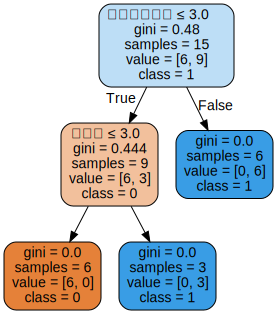

In [3]:
# 数据预处理
le_x = preprocessing.LabelEncoder()
le_x.fit(np.unique(X_train))
X_train = X_train.apply(le_x.transform)

le_y = preprocessing.LabelEncoder()
le_y.fit(np.unique(y_train))
y_train = y_train.apply(le_y.transform)

# 调用sklearn.DT建立训练模型
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# 可视化
dot_data = tree.export_graphviz(model_tree, out_file = None,
                               feature_names = features,
                               class_names = [str(k) for k in np.unique(y_train)],
                               filled = True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph